# h_maxima

This utility notebook measures h_maxima as implemented by scikit, as well as re-implemented using optimized OpenCV primitives, and custom python code.

## Quickstart

```
cd $checkout_root
python -m venv venv
source venv/bin/activate 
# OR on windows: venv\scripts\activate

jupyter-lab .
# Open this notebook & run!

# You need raw predictions (before postprocessing)
# The repo file sample3_raw_predicted_maxima.npz is such a file, and is used in the code below.
```

In [1]:
import cv2
import numpy as np
import sys
from skimage.morphology import h_maxima
from skimage.morphology import disk
import timeit

from matplotlib import pyplot as plt

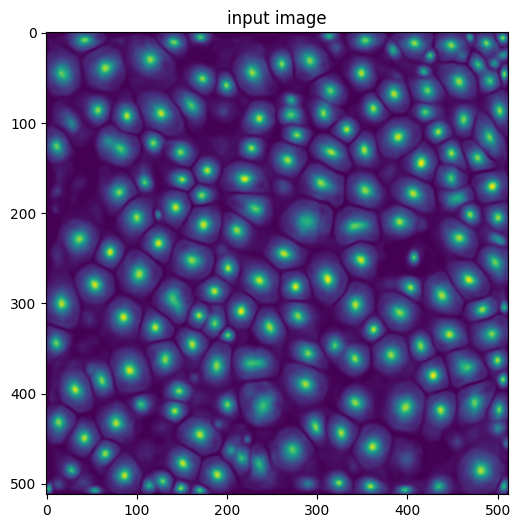

In [2]:
marker_filename = "../../xenium_raw_predicted_maxima.npz"
marker_filename = "../../sample3_raw_predicted_maxima.npz"

with np.load(marker_filename) as loader:
    marker_data = np.load(marker_filename)["arr_0"]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(marker_data[0, ..., 0])

ax.set_title('input image')

plt.show()

In [3]:
from benchmark_utils import scikit_h_maxima, opencv_h_maxima, python_h_maxima, cython_h_maxima

image = marker_data[0, ..., 0]

print("Image size: %s" % (image.shape,))

t = timeit.default_timer()
scikit_result = scikit_h_maxima(marker_data[0, ..., 0])
scikit_time = timeit.default_timer() - t
print("scikit h_maxima: %s s" % round(scikit_time, 2))

t = timeit.default_timer()
opencv_result = opencv_h_maxima(marker_data[0, ..., 0])
opencv_time = timeit.default_timer() - t
print("opencv h_maxima: %s s" % round(opencv_time, 2))
print("OpenCV Speedup: %sx" % round(scikit_time / opencv_time, 2))
print("scikit == opencv : %s" % (scikit_result == opencv_result).all())

t = timeit.default_timer()
python_result = cython_h_maxima(marker_data[0, ..., 0])
python_time = timeit.default_timer() - t
print("custom cython h_maxima: %s s" % round(python_time, 2))
print("Cython speedup: %sx" % round(scikit_time / python_time, 2))
print("scikit == custom cython : %s" % (scikit_result == python_result).all())

Image size: (512, 512)
scikit h_maxima: 0.15 s
opencv h_maxima: 0.02 s
OpenCV Speedup: 9.26x
scikit == opencv : True
custom cython h_maxima: 6.74 s
Cython speedup: 0.02x
scikit == custom cython : True


In [5]:
diff = np.abs(scikit_result - opencv_result)
print("results sizes: %s, %s" % (scikit_result.shape, opencv_result.shape))
print("results     equal: %s" % (diff == 0).sum())
print("results different: %s" % (diff != 0).sum())
print("smallest difference: %s" % (diff.min()))
print(" largest difference: %s" % (diff.max()))
print(" average difference: %s" % (diff.mean()))

results sizes: (512, 512), (512, 512)
results     equal: 262144
results different: 0
smallest difference: 0
 largest difference: 0
 average difference: 0.0


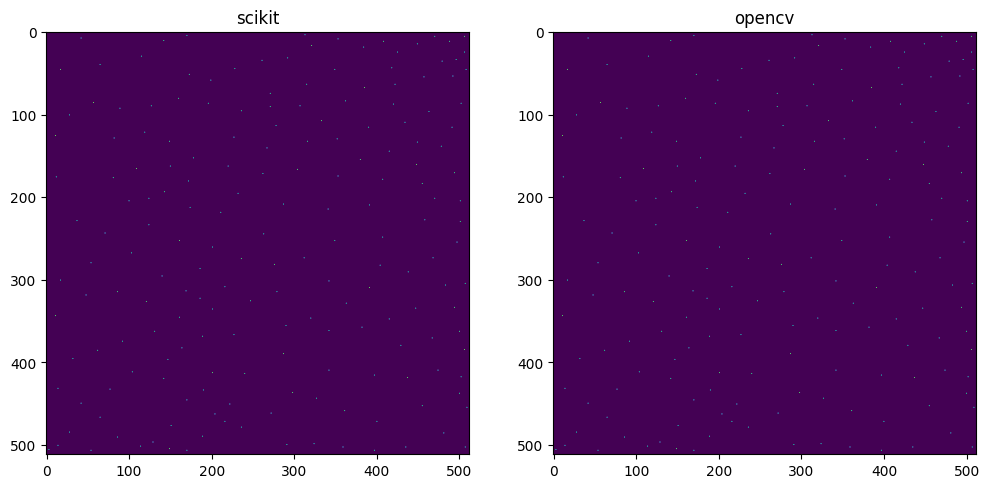

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].imshow(scikit_result)
ax[1].imshow(opencv_result)

ax[0].set_title('scikit')
ax[1].set_title('opencv')

plt.show()